In [9]:
!pip install sktime --user

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
  Using cached numpy-1.21.5-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.


In [8]:
!python -m pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [11]:
!pip install numpy==1.19.3

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
  Using cached numpy-1.19.3-cp38-cp38-manylinux2010_x86_64.whl (14.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
sktime 0.11.0 requires numpy<1.22,>=1.21.0, but you have numpy 1.19.3 which is incompatible.


In [1]:
import sys
import pandas as pd

sys.path.append('../src/')
sys.path.append('/home/ec2-user/.local/lib/python3.8/site-packages/')
sys.path.append('/home/ec2-user/anaconda3/envs/python3/lib/python3.8/site-packages')
sys.path.append('/home/ec2-user/.local/lib/python3.8/site-packages')
from loading import s3_csv_path
from sktime.transformations.panel.rocket import Rocket

In [2]:
X_train_s3 = s3_csv_path('data4studying','tabular-playground-series-apr-2022/train.csv')
y_train_s3 = s3_csv_path('data4studying','tabular-playground-series-apr-2022/train_labels.csv')
X_test_s3 = s3_csv_path('data4studying','tabular-playground-series-apr-2022/test.csv')

In [3]:
X_train = pd.read_csv(X_train_s3)
y_train = pd.read_csv(y_train_s3)
X_test = pd.read_csv(X_test_s3)

In [4]:
sensor_cols = [col for col in X_train.columns if 'sensor' in col ] 

### Plot of Signals and State

Matplotlib is building the font cache; this may take a moment.


<AxesSubplot:>

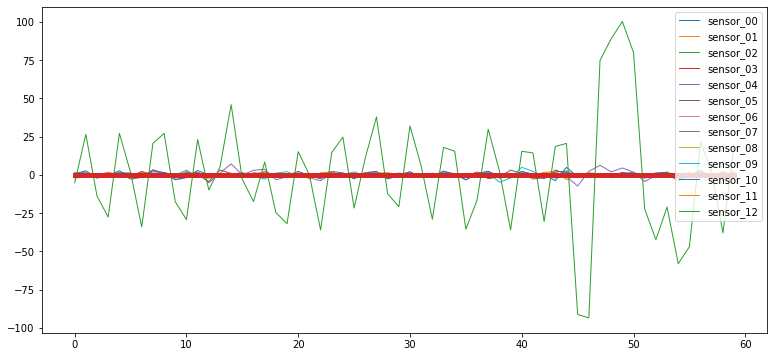

In [5]:
seq = 118
seq = int(seq)
sub_X = X_train[X_train['sequence'] == seq]
tmp = sub_X.merge(y_train,left_on='sequence',right_on='sequence')

tmp[sensor_cols].plot(kind='line', figsize=(13,6),linewidth=1)
tmp['state'].plot(kind='line', figsize=(13,6),linewidth=5)

### Putting in Format for Rocket

In [6]:
%%time
nX_train = X_train[['sequence'] + sensor_cols].groupby('sequence').agg({f'{x}': lambda x: list(x) for x in sensor_cols})
nX_test = X_test[['sequence'] + sensor_cols].groupby('sequence').agg({f'{x}': lambda x: list(x) for x in sensor_cols})

CPU times: user 7.9 s, sys: 736 ms, total: 8.63 s
Wall time: 8.63 s


In [12]:
nX_train = nX_train.applymap(lambda x: pd.Series(x))
nX_test = nX_test.applymap(lambda x: pd.Series(x))

In [ ]:
rocket = Rocket()
rocket.fit(nX_train)
X_train_transform = rocket.transform(nX_train)